In [1]:
# segundo circuito para VQE en CPC2018
# incorpora tres términos del hamiltoniano: Z1+Z2+M1M2

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, register, get_backend
import Qconfig
try:
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
    print("La Configuracion esta OK")
except:
    qx_config = {
        "APItoken":"YOUR_TOKEN_HERE",
        "url":"https://quantumexperience.ng.bluemix.net/api"}

register(qx_config['APItoken'], qx_config['url'])
print("Los backends disponibles son:")
available_backends()

La Configuracion esta OK
Los backends disponibles son:


['ibmq_16_rueschlikon',
 'ibmq_5_tenerife',
 'ibmq_5_yorktown',
 'ibmq_qasm_simulator',
 'local_qasm_simulator',
 'local_statevector_simulator',
 'local_unitary_simulator']

In [2]:
q = QuantumRegister(2)
res = ClassicalRegister(2)

In [3]:
#s = 8 # 1000
lambd=3.141592*0.15;

prepara_estado = QuantumCircuit(q, res)
prepara_estado.h(q[0])
prepara_estado.cx(q[0],q[1])
prepara_estado.x(q[0])
prepara_estado.u1(lambd,q[0])


In [4]:
print(prepara_estado.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
x q0[0];
u1(0.471238800000000) q0[0];



In [5]:
mide_energiaZ = QuantumCircuit(q, res)
mide_energiaZ += prepara_estado
mide_energiaZ.measure(q, res)
mide_energiaMM = QuantumCircuit(q, res)
mide_energiaMM += prepara_estado
mide_energiaMM.cx(q[0],q[1])
mide_energiaMM.h(q[0])
mide_energiaMM.measure(q, res)

In [6]:


print(mide_energiaZ.qasm())
print(mide_energiaMM.qasm())



OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
x q0[0];
u1(0.471238800000000) q0[0];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
x q0[0];
u1(0.471238800000000) q0[0];
cx q0[0],q0[1];
h q0[0];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



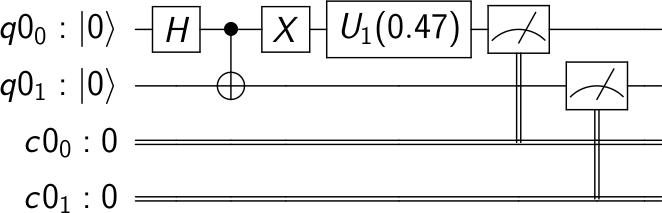

In [7]:
from qiskit.tools.visualization import circuit_drawer
 
circuit_drawer(mide_energiaZ)



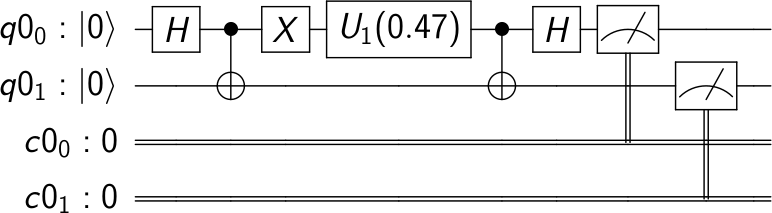

In [8]:

 


circuit_drawer(mide_energiaMM)

In [9]:
backend = "local_qasm_simulator"
#backend='ibmq_5_tenerife'

import time 

print("El estado del backend:", backend, "es:", get_backend(backend).status)

repeticiones = 1024 
  
sc = {
    "noise_params":{
        "readout_error": 0.025,
        "cx": {"p_depol": 0.05}
    }
}

if get_backend(backend).status["operational"] is True:
   tareaZ = execute(mide_energiaZ, backend=backend, shots=repeticiones,config=sc)
intentos = 0
intervalo = 10
while not tareaZ.done:
        print('Estado a los {} segundos de solicitar la ejecucion de Z:'.format(intervalo * intentos))
        print(tareaZ.status)
        time.sleep(intervalo)
        intentos += 1
print(tareaZ.status)


if get_backend(backend).status["operational"] is True:
   tareaMM = execute(mide_energiaMM, backend=backend, shots=repeticiones,config=sc)
intentos = 0
intervalo = 10
while not tareaMM.done:
        print('Estado a los {} segundos de solicitar la ejecucion de MM:'.format(intervalo * intentos))
        print(tareaMM.status)
        time.sleep(intervalo)
        intentos += 1
print(tareaMM.status)


El estado del backend: local_qasm_simulator es: {'name': 'local_qasm_simulator_cpp', 'operational': True, 'pending_jobs': 0}
Estado a los 0 segundos de solicitar la ejecucion de Z:
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}
Estado a los 0 segundos de solicitar la ejecucion de MM:
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}


In [10]:


resultadosZ=tareaZ.result()    
estadisticasZ = resultadosZ.get_counts() # diccionario Python   
print(resultadosZ)
print(estadisticasZ)
print(estadisticasZ.keys())
for k in estadisticasZ.keys():
    print("valor Z = ",k," veces= ",estadisticasZ[k])


resultadosMM=tareaMM.result()    
estadisticasMM = resultadosMM.get_counts() # diccionario Python   
print(resultadosMM)
print(estadisticasMM)
print(estadisticasMM.keys())
for k in estadisticasMM.keys():
    print("valor MM = ",k," veces= ",estadisticasMM[k])


COMPLETED
{'00': 18, '01': 435, '10': 540, '11': 31}
dict_keys(['00', '01', '10', '11'])
valor Z =  00  veces=  18
valor Z =  01  veces=  435
valor Z =  10  veces=  540
valor Z =  11  veces=  31
COMPLETED
{'00': 13, '01': 2, '10': 934, '11': 75}
dict_keys(['00', '01', '10', '11'])
valor MM =  00  veces=  13
valor MM =  01  veces=  2
valor MM =  10  veces=  934
valor MM =  11  veces=  75


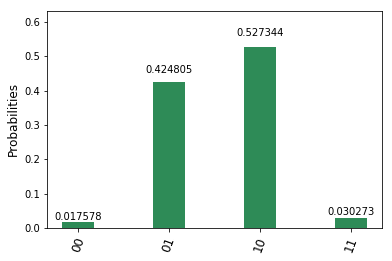

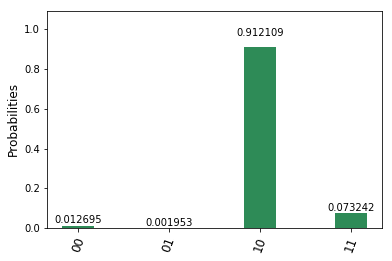

In [11]:
#import matplotlib.pyplot as plt
#%matplotlib inline
from qiskit.tools.visualization import plot_histogram

plot_histogram(estadisticasZ)
plot_histogram(estadisticasMM)

In [12]:
energiaZ=0.0
if '00' in estadisticasZ.keys():
    energiaZ+=1.0*estadisticasZ['00']/repeticiones
if '11' in estadisticasZ.keys():
    energiaZ+=-1.0*estadisticasZ['11']/repeticiones    

energiaMM=0.0
if '00' in estadisticasMM.keys():
    energiaMM+=1.0*estadisticasMM['00']/repeticiones
if '01' in estadisticasMM.keys():
    energiaMM+=1.0*estadisticasMM['01']/repeticiones
if '10' in estadisticasMM.keys():
    energiaMM+=1.0*estadisticasMM['10']/repeticiones
if '11' in estadisticasMM.keys():
    energiaMM+=-3.0*estadisticasMM['11']/repeticiones    

energia=energiaZ+energiaMM
print("energia    %5.3f" % energia)

energia    0.694
